In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sb

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls /content/

automobile.csv	car_data.csv  melb_data.csv  Mumbai.csv  sample_data


In [ ]:
df = pd.read_csv('/content/automobile.csv')
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<Axes: xlabel='price'>

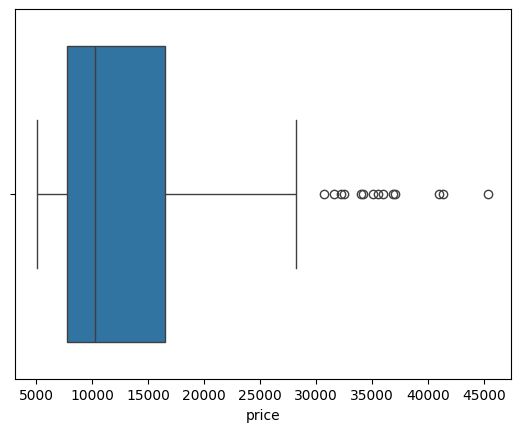

In [ ]:
sb.boxplot(x = df['price'])


<Axes: xlabel='horsepower', ylabel='price'>

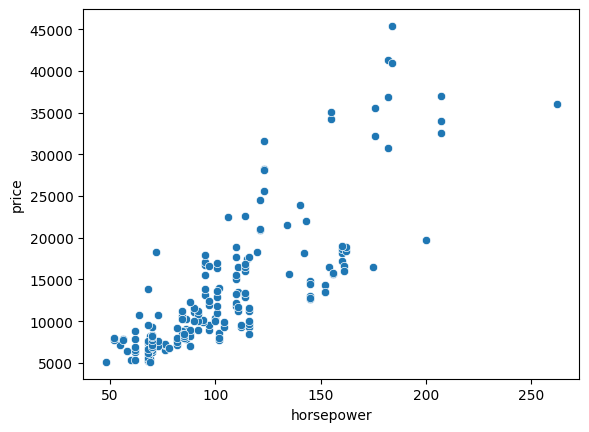

In [ ]:
sb.scatterplot(x = df['horsepower'], y = df['price'])


<Axes: xlabel='highway-mpg', ylabel='price'>

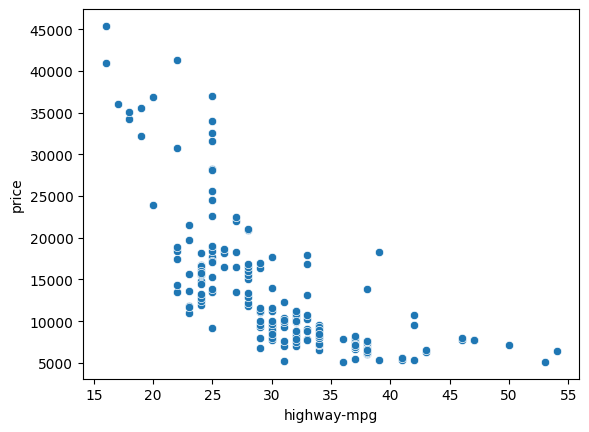

In [ ]:
sb.scatterplot(x = df['highway-mpg'], y = df['price'])


In [ ]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_test.head()
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot


price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<Axes: xlabel='None-body-style', ylabel='drive-wheels'>

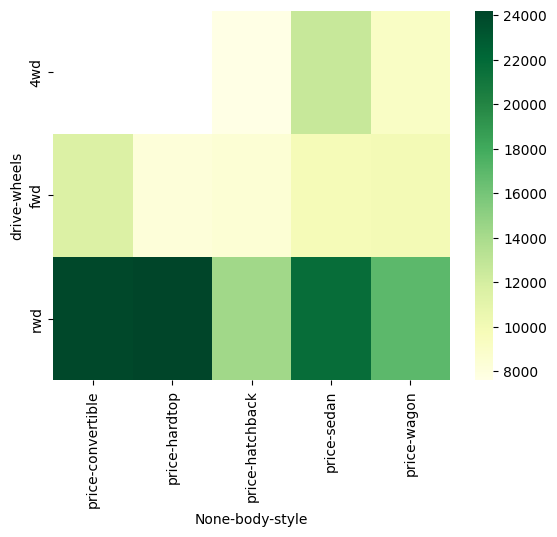

In [ ]:
sb.heatmap(df_pivot, cmap= 'YlGn')